In [1]:
import numpy as np
from tifffile import imsave
from NtruEncrypt import *
from Polynomial import Zx
from num_to_polynomial import *
import matplotlib.pyplot as plt 
import imageio
from numpy import asarray
from PIL import Image
%matplotlib inline

In [2]:
def scale_array(dat, out_range=(0, 1)):
    domain = [np.min(dat, axis=0), np.max(dat, axis=0)]
    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x
    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b
    return interp(uninterp(dat))

In [3]:
def revert_dimension(lst,a,b):
    rd = []
    for i in range(a):
        t = []
        for j in range(b):
            t.append(lst[j+i*b])
        rd.append(t)
    return rd

In [4]:
def flatten_list(lst):
    return [val for l in lst for val in l]

In [5]:
d = 5
p = 3
q = 128

message = input("Enter Message: ")

print('Curve Parameters')
elliptic_a = int(input("Enter A: "))
elliptic_b = int(input("Enter B: "))

character_polynomials,N = koblitz_encoder(message,elliptic_a,elliptic_b) 

public_key,private_key = generate_keypair(p,q,d,N)

print('\nPublic Key = ',end='')
print(public_key.print_polynomial())

print('\nEncrypted = ')
cipher_polys = []
coefficients = []
for element in character_polynomials:
    cipher_text = encrypt(element,public_key,d,N,q)
    cipher_text.coeffs = list(map(int, cipher_text.coeffs))
    cipher_polys.append(cipher_text)
    coefficients.append(cipher_text.coeffs)
print(coefficients)

Enter Message: Awnon
Curve Parameters
Enter A: 9
Enter B: 7

Public Key = (-52x^14) + (38x^13) + (-1x^12) + (-25x^11) + (10x^10) + (8x^9) + (-20x^8) + (39x^7) + (-32x^6) + (34x^5) + (-64x^4) + (-51x^3) + (10x^2) + (52x) + (29)

Encrypted = 
[[62, 2, 14, 44, -16, 36, -35, -57, -62, -29, -47, 33, 6, 48, 25], [-23, 4, -42, 54, -60, 23, -50, 17, 36, -9, 2, 41, 26, 34, -52], [54, -51, -18, 23, -26, 2, -38, 32, 13, -19, 40, -15, 56, -43, -36], [39, -57, 29, 22, -41, 43, 29, 8, -17, 5, -61, 20, 53, 60, -56], [-49, 62, 6, 2, -52, 39, -49, 6, -37, 46, -4, 1, 26, -38, -35]]


In [6]:
x_trans = scale_array(flatten_list(coefficients))

print('Convert this to image:\n')
to_img = revert_dimension(x_trans,len(coefficients),N)
print(to_img)

to_img = np.asarray(to_img)

print('\nGenerating Image...')

imsave('encrypted_image.tiff', to_img)

Convert this to image:

[[1.0, 0.5161290322580645, 0.6129032258064516, 0.8548387096774194, 0.3709677419354839, 0.7903225806451613, 0.21774193548387097, 0.04032258064516129, 0.0, 0.2661290322580645, 0.12096774193548387, 0.7661290322580645, 0.5483870967741935, 0.8870967741935484, 0.7016129032258065], [0.31451612903225806, 0.532258064516129, 0.16129032258064516, 0.9354838709677419, 0.016129032258064516, 0.6854838709677419, 0.0967741935483871, 0.6370967741935484, 0.7903225806451613, 0.4274193548387097, 0.5161290322580645, 0.8306451612903226, 0.7096774193548387, 0.7741935483870968, 0.08064516129032258], [0.9354838709677419, 0.08870967741935484, 0.3548387096774194, 0.6854838709677419, 0.2903225806451613, 0.5161290322580645, 0.1935483870967742, 0.7580645161290323, 0.6048387096774194, 0.3467741935483871, 0.8225806451612904, 0.3790322580645161, 0.9516129032258065, 0.1532258064516129, 0.20967741935483872], [0.8145161290322581, 0.04032258064516129, 0.7338709677419355, 0.6774193548387096, 0.169354

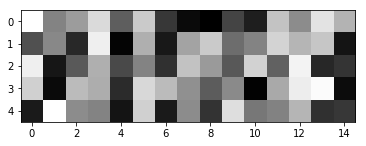

In [7]:
plt.imshow(to_img, cmap='gray')
plt.show()

In [8]:
image = imageio.imread('encrypted_image.tiff')

pixels = asarray(image)

print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float64')

print(pixels)
decoded_coefficients = []
for p in pixels:
    for j in p:
        decoded_coefficients.append(j)



Data Type: float64
Min: 0.000, Max: 1.000
[[1.         0.51612903 0.61290323 0.85483871 0.37096774 0.79032258
  0.21774194 0.04032258 0.         0.26612903 0.12096774 0.76612903
  0.5483871  0.88709677 0.7016129 ]
 [0.31451613 0.53225806 0.16129032 0.93548387 0.01612903 0.68548387
  0.09677419 0.63709677 0.79032258 0.42741935 0.51612903 0.83064516
  0.70967742 0.77419355 0.08064516]
 [0.93548387 0.08870968 0.35483871 0.68548387 0.29032258 0.51612903
  0.19354839 0.75806452 0.60483871 0.34677419 0.82258065 0.37903226
  0.9516129  0.15322581 0.20967742]
 [0.81451613 0.04032258 0.73387097 0.67741935 0.16935484 0.84677419
  0.73387097 0.56451613 0.36290323 0.54032258 0.00806452 0.66129032
  0.92741935 0.98387097 0.0483871 ]
 [0.10483871 1.         0.5483871  0.51612903 0.08064516 0.81451613
  0.10483871 0.5483871  0.2016129  0.87096774 0.46774194 0.50806452
  0.70967742 0.19354839 0.21774194]]


In [9]:
x_inv = scale_array(decoded_coefficients,(np.min(flatten_list(coefficients), axis=0), np.max(flatten_list(coefficients), axis=0)))
x_inv = [round(i) for i in x_inv]
x_inv = list(map(int, x_inv))
decoded_coefficients = revert_dimension(x_inv,len(coefficients),N)

In [10]:
print(decoded_coefficients)

[[62, 2, 14, 44, -16, 36, -35, -57, -62, -29, -47, 33, 6, 48, 25], [-23, 4, -42, 54, -60, 23, -50, 17, 36, -9, 2, 41, 26, 34, -52], [54, -51, -18, 23, -26, 2, -38, 32, 13, -19, 40, -15, 56, -43, -36], [39, -57, 29, 22, -41, 43, 29, 8, -17, 5, -61, 20, 53, 60, -56], [-49, 62, 6, 2, -52, 39, -49, 6, -37, 46, -4, 1, 26, -38, -35]]


In [11]:
print(coefficients)

[[62, 2, 14, 44, -16, 36, -35, -57, -62, -29, -47, 33, 6, 48, 25], [-23, 4, -42, 54, -60, 23, -50, 17, 36, -9, 2, 41, 26, 34, -52], [54, -51, -18, 23, -26, 2, -38, 32, 13, -19, 40, -15, 56, -43, -36], [39, -57, 29, 22, -41, 43, 29, 8, -17, 5, -61, 20, 53, 60, -56], [-49, 62, 6, 2, -52, 39, -49, 6, -37, 46, -4, 1, 26, -38, -35]]


In [12]:
if coefficients == decoded_coefficients:
    print('Complete Match!')
else:
    print('Not Equal!')

Complete Match!
